# Chapter 4.신경망 학습

## 4.2 손실함수

### 4.2.1 오차제곱합

In [1]:
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [2]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### 4.2.2 교차 엔트로피 오차

In [4]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta)) # np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없기 때문에
                                        # 아주 작은 값인 delta를 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것이다. 

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습
- 미니배치: 데이터 일부를 추려 전체의 '근사치'로 이용하는 방법

In [7]:
import sys, os
path = "/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/dataset"
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))

In [8]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, one_hot_label=True) # normalize : 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화 할지 여부, False일 경우 원래값 0~255 사이 유지
                                                                                 # flatten : 입력 이미지를 1차원 배열로 만들지 여부
                                                                                 # one_hot_label : 원-핫 인코딩 형태로 저장할지

In [9]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
np.random.choice(60000,10)

array([16335, 50821,  9920,  1614, 27676, 25099, 48327, 40345, 10139,
       13096])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [12]:
# 원핫 인코딩일 경우
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [13]:
# 원핫 인코딩이 아닐 경우
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 4.3 수치미분

### 4.3.1 미분

In [14]:
# 나쁜 구현 예
def numerical_diff(f,x):
  h = 1e-50                  # h 값은 0.000...1 형태에서 소수점 아래 0이 50개라는 의미
  return (f(x+h) - f(x)) / h

In [15]:
np.float32(1e-50)

0.0

In [16]:
# 나쁜 구현의 에에는 오차가 포함된다. 따라서 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중앙 차분을 이용한다
# 차분 : 임의 두 점에서의 함수 값들의 차이를 말한다
def numerical_diff(f, x):
  h = 1e-4 # 0.0001 좋은 결과를 얻는다고 알려진 값
  return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예
2차 함수의 미분
y = 0.01x**2 + 0.1x

In [17]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

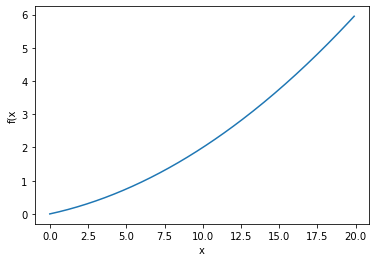

In [18]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x")
plt.plot(x,y)
plt.show()

In [19]:
numerical_diff(function_1,5)

0.1999999999990898

In [20]:
numerical_diff(function_1,10)

0.2999999999986347

### 4.3.3 편미분
편미분 : 변수가 여럿인 함수에 대한 미분

In [21]:
# 변수가 2개인 함수
def function_2(x):
  return x[0]**2 + x[1]**2
  # 또는 return np.sum(x**2)

In [22]:
# x0 = 3, x1 = 4 일때, x0에 대한 편미분을 구하라
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

In [23]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [24]:
# x0 = 3, x1 = 4 일 때, x1에 대한 편미분을 구하라
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

In [25]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기
기울기(gradient) : 모든 변수의 편미분을 벡터로 정리한 것

In [26]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
  
  for idx in range(x.size):
    tmp_val = x[idx]
    
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원
  
  return grad

In [27]:
# (3, 4), (0, 2), (3, 0) 에서의 기울기 구하기
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


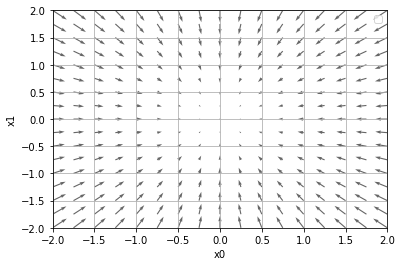

In [28]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다

### 4.4.1 경사법(경사 하강법)
경사법 : 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것을 경사법이라 한다.

In [29]:
# 경사 하강법의 구현, f : 최적화 하려는 함수, init_x : 초깃값, lr : learning rate, step_num : 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [30]:
# 경사법으로 x0 ** 2 + x1 ** 2의 최솟값을 구하라
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
# >> 거의 (0, 0)에 가까운 결과이다

array([-6.11110793e-10,  8.14814391e-10])

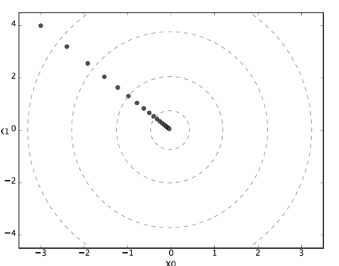

In [31]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [32]:
# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 크면 너무 큰 값으로 발산해버리고, 너무 작으면 거의 갱신되지 않은 채 끝나버린다.

### 4.4.2 신경망에서의 기울기

In [33]:
import sys, os
path = "/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/ch04"
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))

In [34]:
import sys, os
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

# simpleNet : 형상이 2x3 인 가중치 매개변수 하나를 인스턴스 변수로 갖는다.
class simpleNet:
  def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

  # 예측을 수행하는 함수
  def predict(self, x):
        return np.dot(x, self.W)
  
  # 손실 함수의 값을 구하는 함수, x : 입력데이터, t : 정답 레이블
  def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [35]:
net = simpleNet()
print(net.W)

[[ 0.79832931  1.44429395 -0.71384371]
 [-1.4933056  -0.2717339  -0.36897713]]


In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.86497746  0.62201586 -0.76038564]


In [37]:
np.argmax(p) # 최댓값의 인덱스

1

In [38]:
t = np.array([0, 0, 1]) # 정답레이블
net.loss(x, t)

1.7724317951919442

In [39]:
def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09182686  0.40622134 -0.4980482 ]
 [ 0.13774029  0.60933201 -0.7470723 ]]


In [40]:
# 람다를 사용한 구현
f = lambda w:net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [41]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [42]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

## 4.5 학습 알고리즘 구현하기

In [43]:
import sys, os
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  
  # 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    # params 신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수)
    # params['W1'] : 1번째 층의 가중치, params['b1'] : 1번째 층의 편향
    # params['W2'] : 2번째 층의 가중치, params['b2'] : 2번째 층의 편향
      self.params = {}
      self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
      self.params['b1'] = np.zeros(hidden_size)
      self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
      self.params['b2'] = np.zeros(output_size)
  
  def predict(self, x):
      W1, W2 = self.params['W1'], self.params['W2']
      b1, b2 = self.params['b1'], self.params['b2']

      a1 = np.dot(x, W1) + b1
      z1 = sigmoid(a1)
      a2 = np.dot(z1, W2) +b2
      y = softmax(a2)

      return y
  
  # x: 입력 데이터, t: 정답 테이블

  def loss(self, x, t):
      y = self.predict(x)
      
      return cross_entropy_error(y, t)
  
  def accuracy(self, x, t):
      y = self.predict(x)
      y = np.argmax(y, axis=1)
      t = np.argmax(t, axis=1)

      accuracy = np.sum(y==t) / float(x.shape[0])
      return accuracy

  # x : 입력 데이터, t : 정답 레이블

  def numerical_gradient(self, x, t):
      loss_W = lambda W: self.loss(x, t)

      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

      return grads

In [44]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [45]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

In [46]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [47]:
%cd /content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/ch04

/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/ch04


In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # 미니배치 획득
  batch_mast = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) # 성능 개선판!

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7711166666666667, 0.7762
train acc, test acc | 0.8773166666666666, 0.8814
train acc, test acc | 0.89885, 0.902
train acc, test acc | 0.9082666666666667, 0.9113
train acc, test acc | 0.9155666666666666, 0.9163
train acc, test acc | 0.9204833333333333, 0.9213
train acc, test acc | 0.9251166666666667, 0.9249
train acc, test acc | 0.9290166666666667, 0.9303
train acc, test acc | 0.9314833333333333, 0.932
train acc, test acc | 0.9345833333333333, 0.9344
train acc, test acc | 0.9368333333333333, 0.9368
train acc, test acc | 0.9396666666666667, 0.9396
train acc, test acc | 0.9423333333333334, 0.9408
train acc, test acc | 0.94495, 0.9435
train acc, test acc | 0.9459833333333333, 0.9441
train acc, test acc | 0.9479333333333333, 0.9453


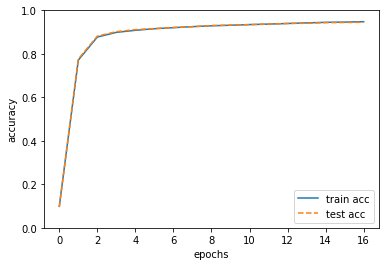

In [49]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Chapter 5.오차역전파법

## 5.4 단순한 계층 구현하기

### 5.4.1 곱셈 계층

In [50]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    
    return out

  def backward(self, dout):
    dx = dout * self.y     # x 와 y 를 바꾼다.
    dy = dout * self.x

    return dx, dy

In [51]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) #220


220.00000000000003


In [52]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


### 5.4.2 덧셈 계층

In [53]:
class AddLayer:
  def __init__(self):
    pass
  
  def forward(self, x, y):
    out = x + y
    return out
  
  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [55]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) # (1)
orange_price = mul_orange_layer.forward(orange, orange_num) # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) # (3)
price = mul_tax_layer.forward(all_price, tax) # (4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) # (1)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


## 5.5 활성화 함수 계층 구현하기

### 5.5.1 ReLU 계층

In [56]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out
  
  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

In [57]:
# mask 는 True/False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외는 False로 유지한다
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [58]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


### 5.5.2 Sigmoid 계층

In [60]:
class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

## 5.6 Affine/Softmax 계층 구현하기
신경망의 순전파 때 수행하는 행렬의 곱은 기하학에서는 어파인 변환(Affine transformation) 이라고 한다. 따라서 어파인 변환을 수행하는 처리를 'Affine 계층' 이라는 이름으로 구현한다.

### 5.6.1 Affine 계층

In [63]:
# dot
X = np.random.rand(2)    # 입력
W = np.random.rand(2,3)  # 가중치
B = np.random.rand(3)    # 편향

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B
print(Y)

(2,)
(2, 3)
(3,)
[0.52520018 1.23800066 1.27515169]


### 5.6.2 배치용 Affine 계층

In [64]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [65]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [67]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [69]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None
  
  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    return dx

### 5.6.3 Softmax-with-Loss 계층

In [71]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [72]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [74]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None  # 손실
    self.y = None     # Softmax의 출력
    self.t = None     # 정답 레이블(원-핫 벡터)
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    
    return dx

## 5.7 오차역전파법 구현하기

In [75]:
import sys, os
path = "/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥려닝/deep-learning-from-scratch-master/ch05"
parent = os.path.join(path, os.pardir)
sys.path.append(os.path.abspath(parent))

In [76]:
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [80]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":" + str(diff))

W1:2.0814785923306642e-10
b1:1.0713549638538328e-09
W2:7.266514783790811e-08
b2:1.4406845585679394e-07


### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [84]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 오차역전파법으로 기울기를 구한다.
  grad = network.gradient(x_batch, t_batch)

  # 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(train_acc, test_acc)

0.09751666666666667 0.0974
0.78675 0.7947
0.8759666666666667 0.8804
0.8992666666666667 0.9031
0.9077333333333333 0.9109
0.91415 0.9176
0.9196666666666666 0.923
0.9240833333333334 0.9265
0.9273666666666667 0.9294
0.9308166666666666 0.932
0.934 0.9348
0.9370666666666667 0.9376
0.9395166666666667 0.9397
0.9413666666666667 0.9415
0.9437833333333333 0.9429
0.94625 0.9443
0.9475666666666667 0.9462


In [85]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09915 0.1009
0.7993166666666667 0.8051
0.8751833333333333 0.8791
0.8976833333333334 0.9011
0.9064833333333333 0.9104
0.9142833333333333 0.9176
0.9197166666666666 0.9204
0.92435 0.9239
0.9272 0.9278
0.9306666666666666 0.9311
0.9326666666666666 0.9326
0.9350833333333334 0.9355
0.9375166666666667 0.9362
0.9394833333333333 0.938
0.9420666666666667 0.9422
0.94345 0.9426
0.9456666666666667 0.9445
